## Data visualization


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import random
from pathlib import Path
%matplotlib inline

In [2]:
PROJECT_ROOT = Path.cwd().parent
ROOT = PROJECT_ROOT / "data" / "mvtec"

def show_examples(category, split="train", defect="good", n=5):
    if split == "train":
        img_dir = ROOT / category / "train" / "good"
    else:
        img_dir = ROOT / category / "test" / defect

    imgs = list(img_dir.glob("*.png"))

    print("Looking in:", img_dir)
    print("Images found:", len(imgs))

    if len(imgs) == 0:
        raise ValueError("No images found — path wrong")

    picks = random.sample(imgs, min(n, len(imgs)))

    plt.figure(figsize=(12, 6))
    for i, p in enumerate(picks):
        plt.subplot(1, len(picks), i + 1)
        plt.imshow(Image.open(p))
        plt.title(p.parent.name)
        plt.axis("off")
    plt.show()


Looking in: /Users/keshavaryan/Documents/dl_project/visual-anomaly-detection-cnn/data/mvtec/bottle/train/good
Images found: 209


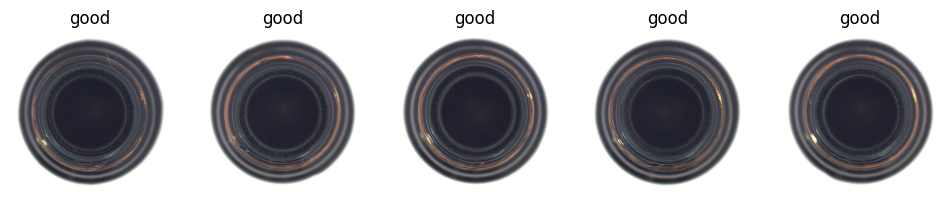

Looking in: /Users/keshavaryan/Documents/dl_project/visual-anomaly-detection-cnn/data/mvtec/bottle/test/broken_large
Images found: 20


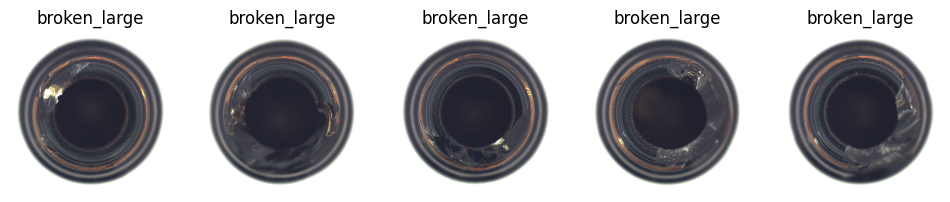

Looking in: /Users/keshavaryan/Documents/dl_project/visual-anomaly-detection-cnn/data/mvtec/cable/test/bent_wire
Images found: 13


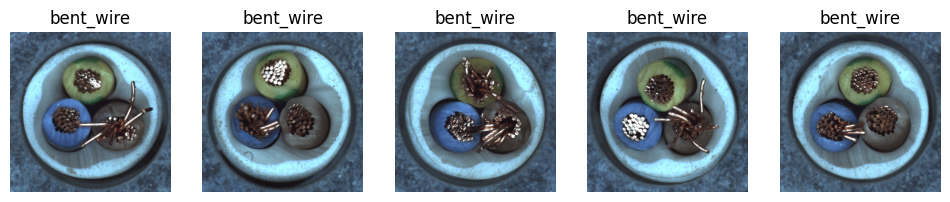

Looking in: /Users/keshavaryan/Documents/dl_project/visual-anomaly-detection-cnn/data/mvtec/wood/test/hole
Images found: 10


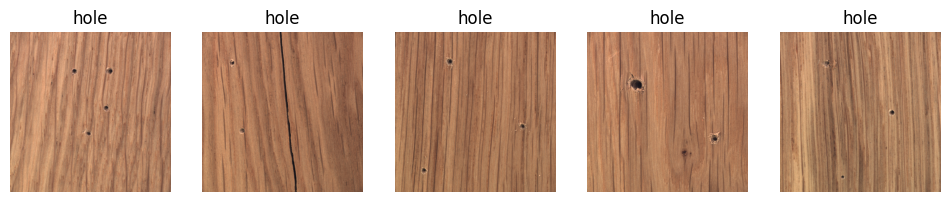

In [3]:
show_examples("bottle", "train")
show_examples("bottle", "test", defect="broken_large")
show_examples("cable", "test", defect="bent_wire")
show_examples("wood", "test", defect="hole")

In [4]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().parent
sys.path.append(str(PROJECT_ROOT))

In [5]:
from src.data_loader import (
    get_train_paths,
    get_test_paths,
    build_train_dataset,
    build_test_dataset
)

In [6]:
category = "bottle"

train_paths = get_train_paths(category)

print(type(train_paths[0]))
print(train_paths[0])

<class 'str'>
/Users/keshavaryan/Documents/dl_project/visual-anomaly-detection-cnn/data/mvtec/bottle/train/good/176.png


In [7]:
train_ds = build_train_dataset(train_paths)

for batch in train_ds.take(1):
    print(batch.shape)

(16, 256, 256, 3)


2026-01-05 03:12:31.516248: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
